### **Desafío - Gráficos y correlación**

#### **`1. Importar librerías y cargar archivo csv`**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# evitar warnings y deprecaciones 
import warnings 
warnings.filterwarnings(action="ignore")

plt.style.use('seaborn') # gráficos estilo seaborn 
plt.rcParams["figure.figsize"] = (10,6) # Tamaño gráficos 
plt.rcParams["figure.dpi"] = 200 # resolución gráficos

In [3]:
import os
os.listdir()

['01_Desafío_guiado_-_Gráficos_y_correlación.ipynb',
 '01_Desafío_guiado_-_Gráficos_y_correlación.pdf',
 '02_Desafío_evaluado_-_Gráficos_y_correlación.ipynb',
 '02_Desafío_evaluado_-_Pruebas_de_hipótesis.pdf',
 'Desafio_8_Prueba_de Hipotesis_Plantilla.ipynb',
 'Desafío - Pruebas de hipótesis.ipynb',
 'nations.csv']

In [4]:
path_normal = "nations.csv"
# Podemos usar para el formato de letras -> encoding='latin-1'
# Podemos usar para no utilizar la columna 'Unnamed' como index -> df = pd.read_csv(path_normal, encoding= 'iso-8859-1', index_col=0)
df = pd.read_csv(path_normal, encoding= 'iso-8859-1').drop(columns = 'Unnamed: 0')
df.shape

(194, 13)

In [5]:
df.head(10)

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.00,NaN
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.20,NaN
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.20,NaN
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.20,NaN
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999
5,Cameroon,Africa,1986.800049,5.650000,127.800003,155.00,50.116665,18564118,56.366665,0.6532,NaN,0.75,NaN
6,Cape Verde,Africa,3052.199951,3.500000,81.599998,30.00,73.333336,484867,59.283333,0.6358,84.800003,2.15,NaN
7,Central African Rep,Africa,677.000000,3.383333,106.599998,173.50,45.933334,4203917,38.466667,0.8222,55.200001,0.20,NaN
8,Chad,Africa,1266.199951,1.500000,164.500000,209.00,48.566666,10509983,26.400000,0.8006,33.599998,0.10,NaN
9,Comoros,Africa,1099.000000,2.800000,58.000000,105.75,59.783333,688300,28.000000,0.8554,74.199997,0.40,NaN


#### **`2 - Generamos un subset de los datos`**

In [6]:
var_all = ['country','region']
var_AN = ['chldmort','adfert','life']
var_MZ = ['femlab','literacy','school']

df_subset = df.loc[:, var_all+var_MZ]
df_subset

,country,region,femlab,literacy,school
0,Algeria,Africa,0.4522,72.599998,6.716667
1,Benin,Africa,0.8482,41.700001,3.100000
2,Botswana,Africa,0.8870,84.099998,8.600000
3,Burkina Faso,Africa,0.8584,23.600000,1.300000
4,Burundi,Africa,1.0344,66.599998,2.483333
...,...,...,...,...,...
189,Samoa,Oceania,0.5010,98.800003,10.300000
190,Solomon Islands,Oceania,0.4858,NaN,4.500000
191,Tonga,Oceania,0.7150,99.000000,10.133333
192,Tuvalu,Oceania,NaN,NaN,NaN


#### **`3 - Refactorizar gráficos matplotlib a seaborn`**

##### **Refactorizar Histograma**

Debemos refactorizar el siguiente histograma `matplotlib` a `seaborn`:

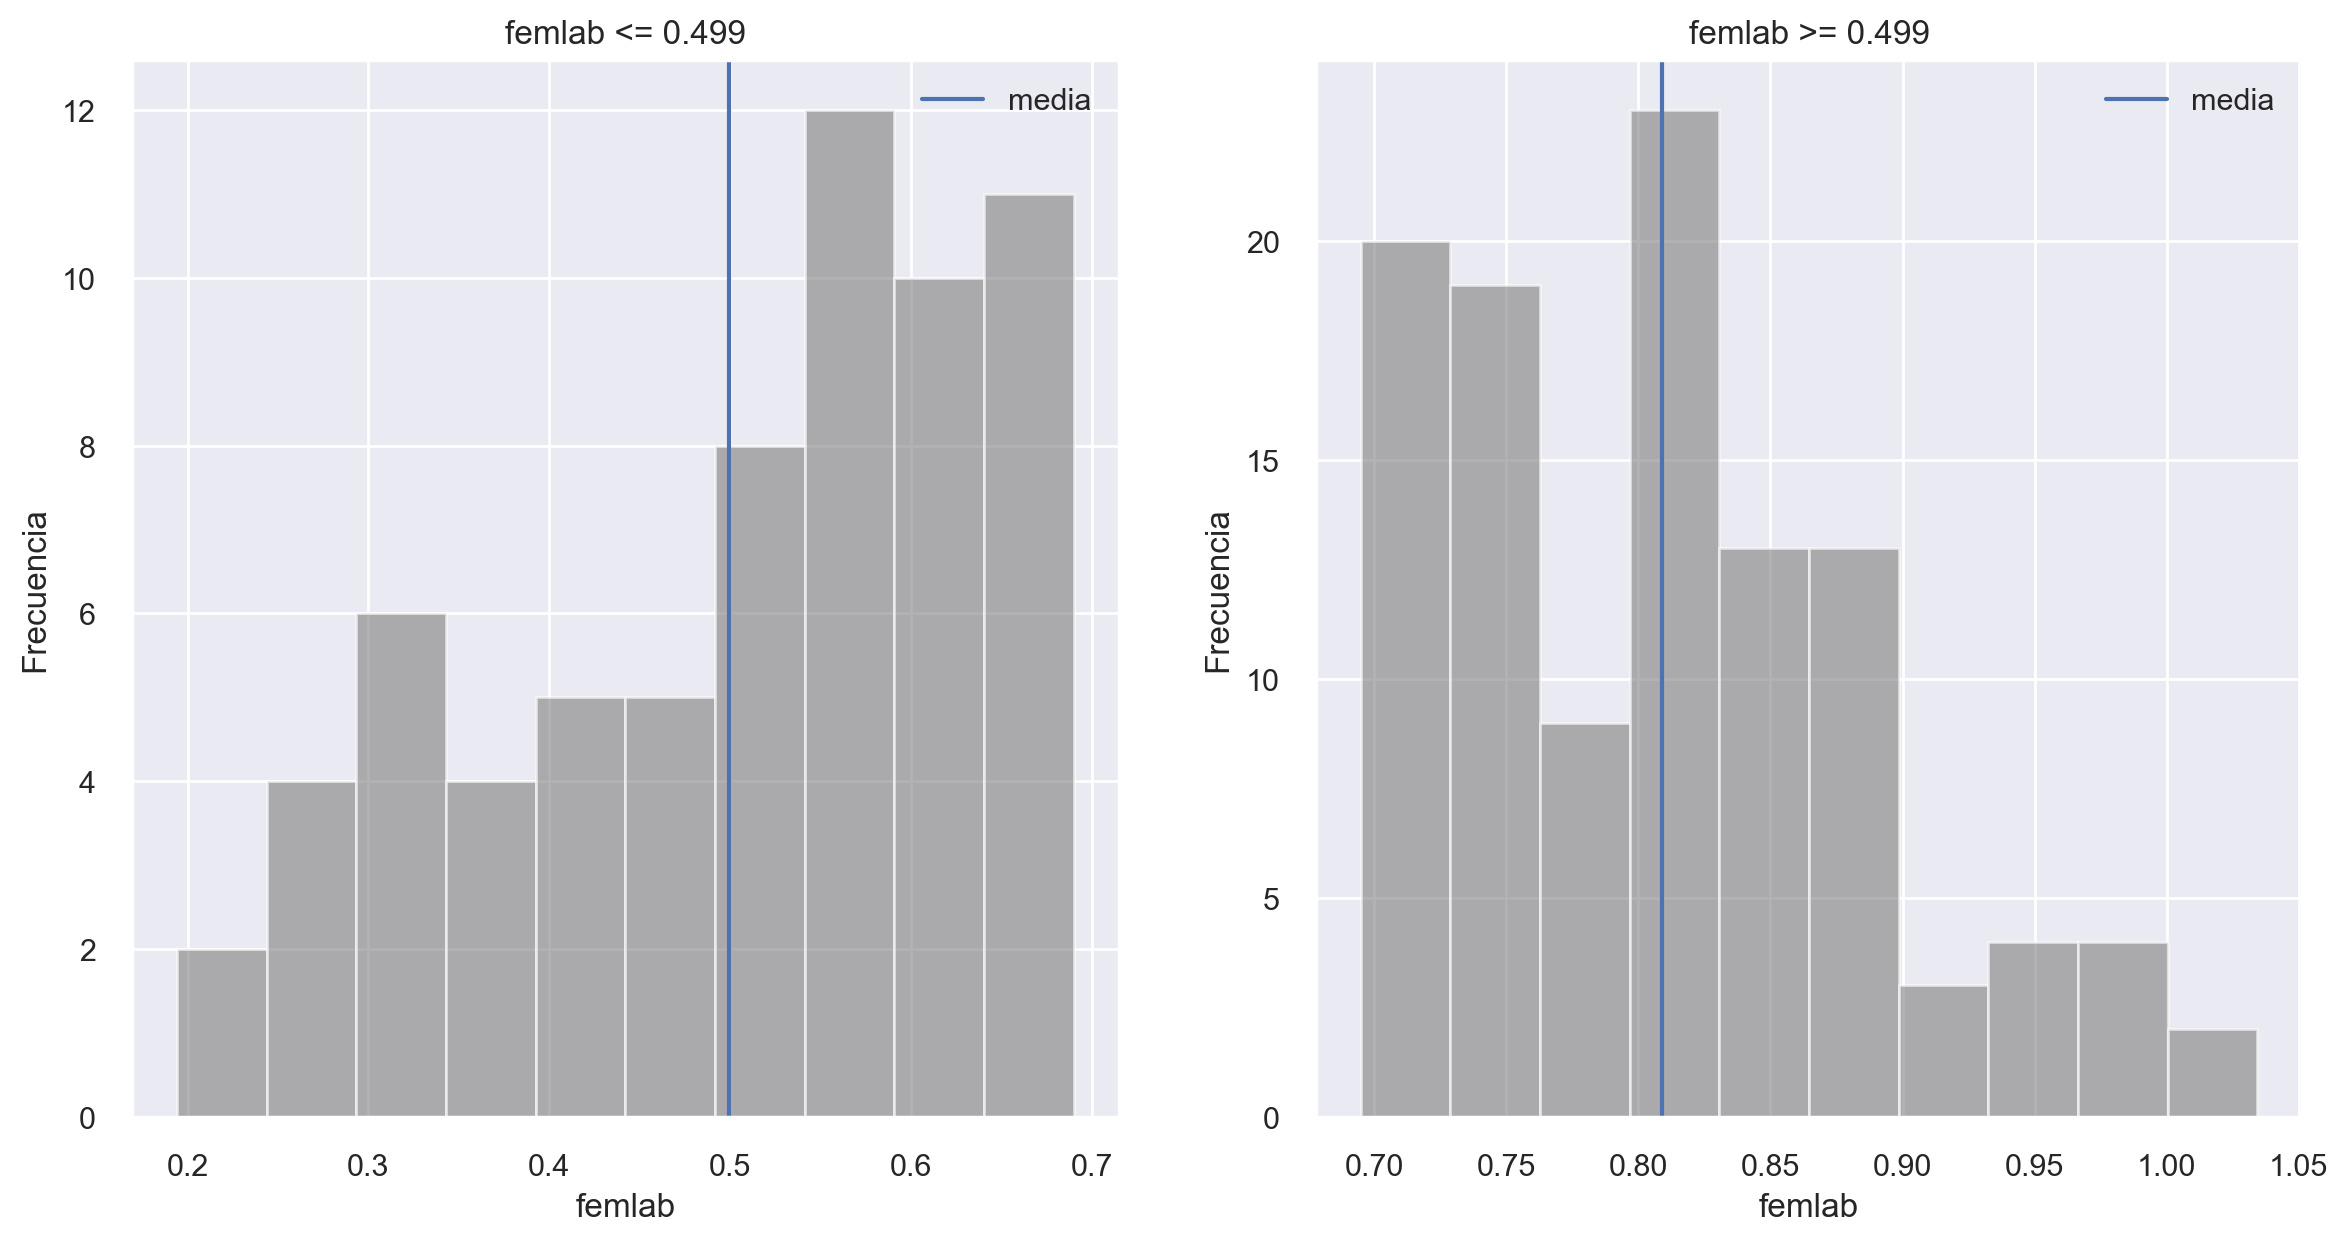

In [35]:
def binarize_histogram(dataframe, variable): 
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna() 
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='grey') 
    plt.axvline(np.mean(hist_0), label='media')
    plt.legend()
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3))) 
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='grey')
    plt.axvline(np.mean(hist_1), label='media')
    plt.legend()    
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')


binarize_histogram(df_subset, 'femlab')

Refactorizamos el gráfico con **`seaborn`**:

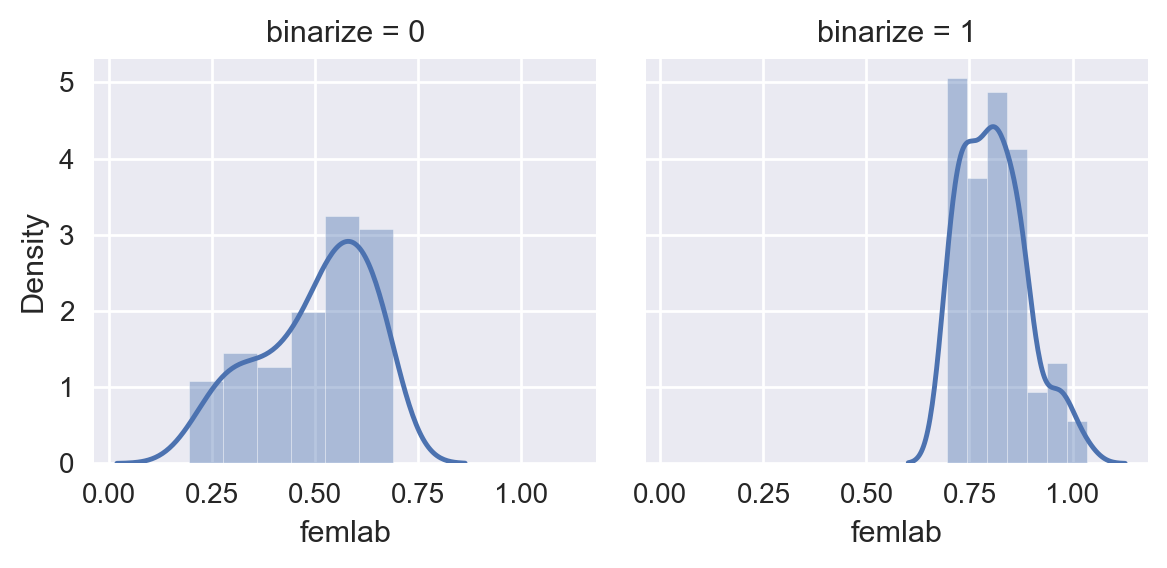

In [45]:
def binarize_histogram_seaborn(dataframe, variable): 
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    grid = sns.FacetGrid(tmp, col='binarize', col_wrap=2)
    grid.map(sns.distplot,variable)
    plt.show()
    
binarize_histogram_seaborn(df, 'femlab')

##### **Refactorizar Boxplot**

Debemos refactorizar el siguiente boxplot `matplotlib` a `seaborn`:

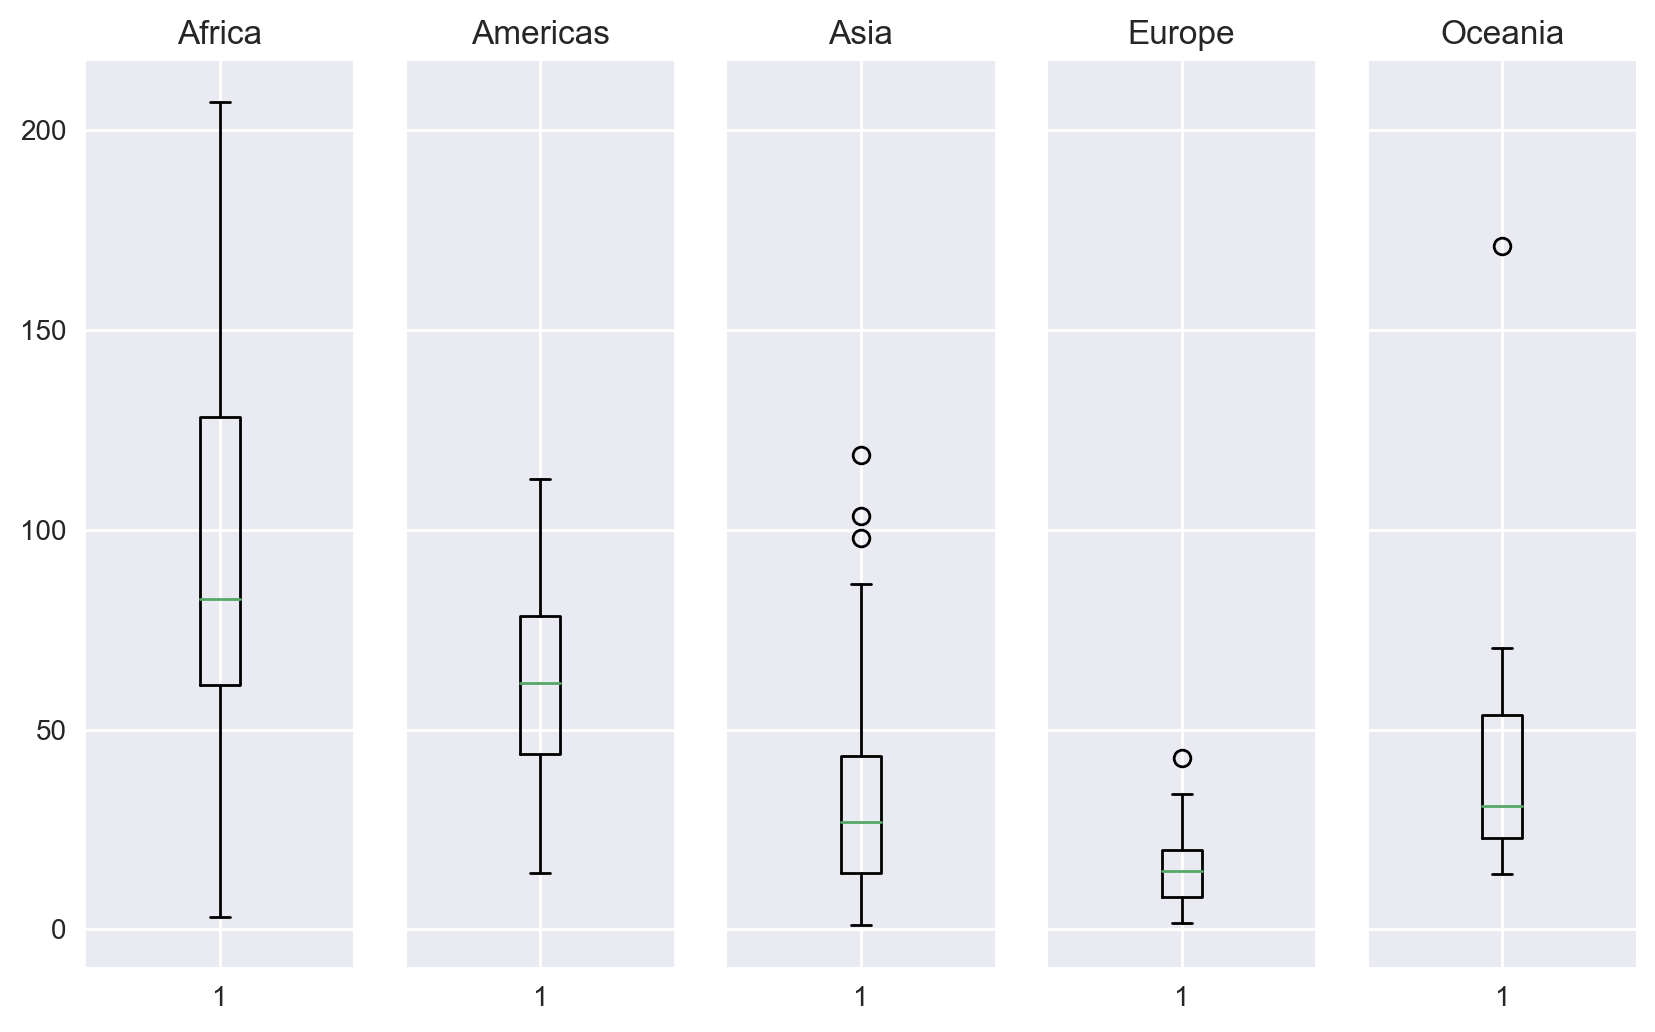

In [57]:
# El 1 establece que los gráficos se proyectaran en una fila. El 2 en dos filas.
# len(stratify_by) --> Establecerá el número de columnas 
# sharey=True ---> Compartir el eje Y

def grouped_boxplot(dataframe, variable, group_by): 
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)

    for i, n in enumerate(stratify_by): 
        ax[i].boxplot(tmp[tmp[group_by] == n][variable]) 
        ax[i].set_title(n)

grouped_boxplot(df, 'adfert', 'region')

Refactorizamos el gráfico con **`seaborn`**:

<AxesSubplot:xlabel='region', ylabel='adfert'>

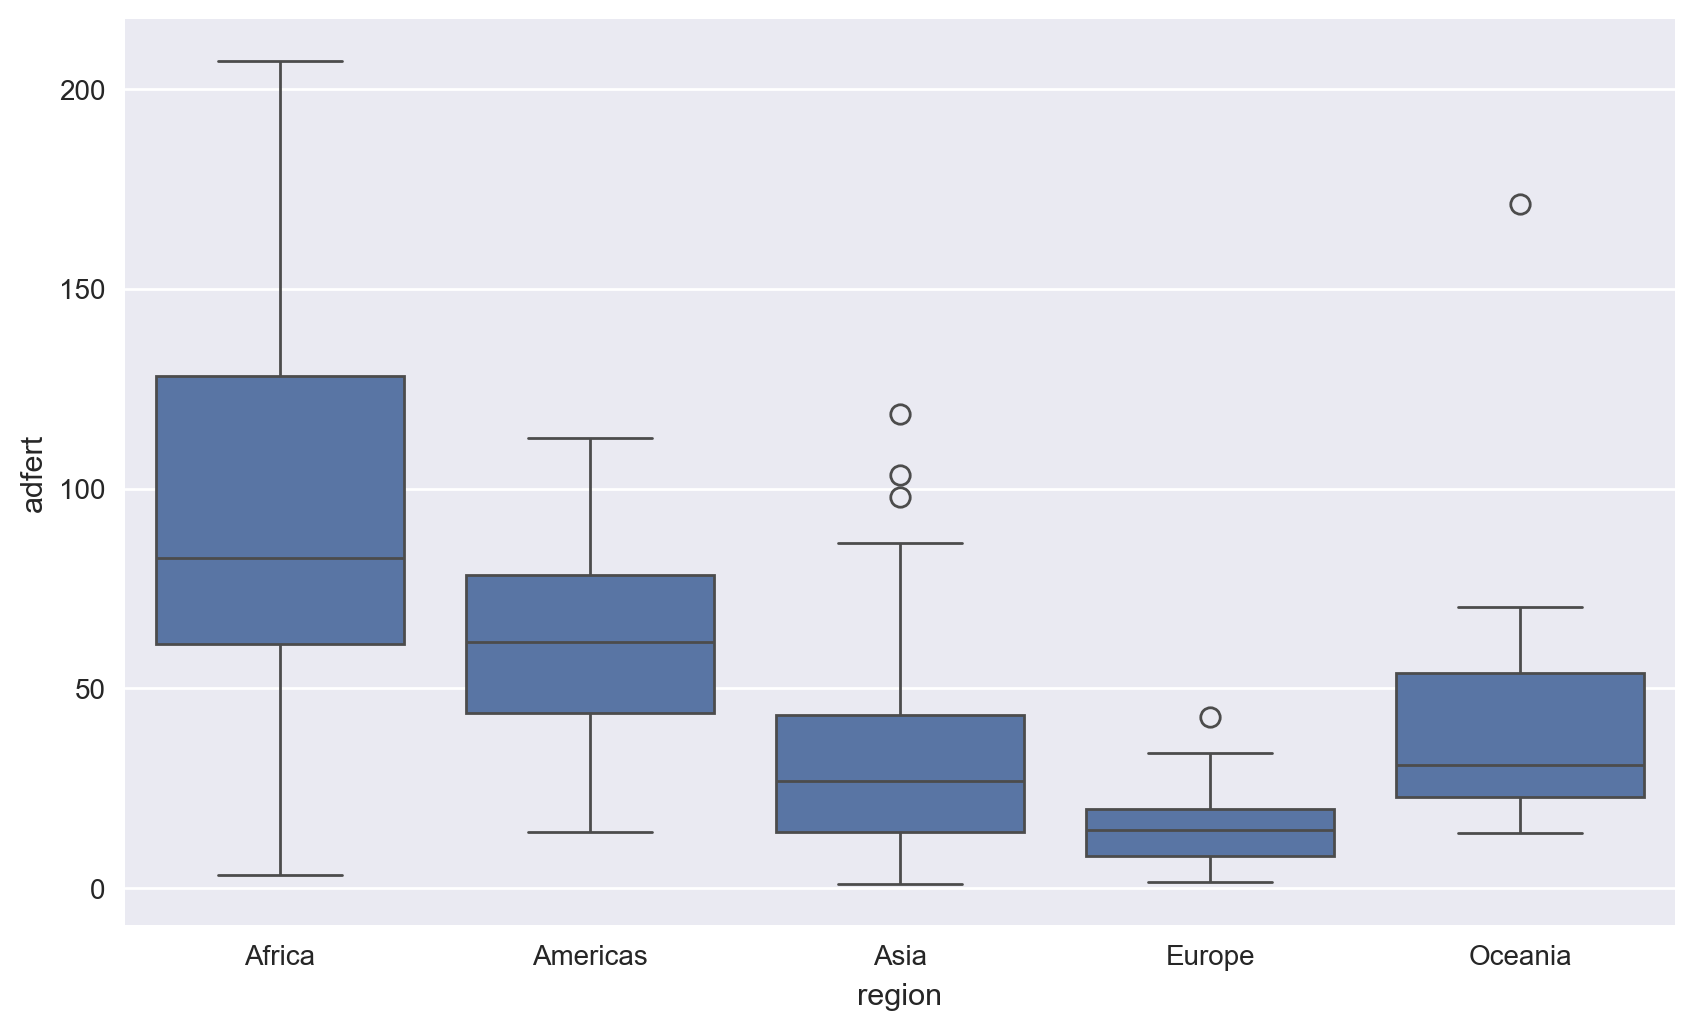

In [46]:
sns.boxplot(data=df, x='region', y='adfert')

Combinación de **`matplotlib`** y **`seaborn`**:

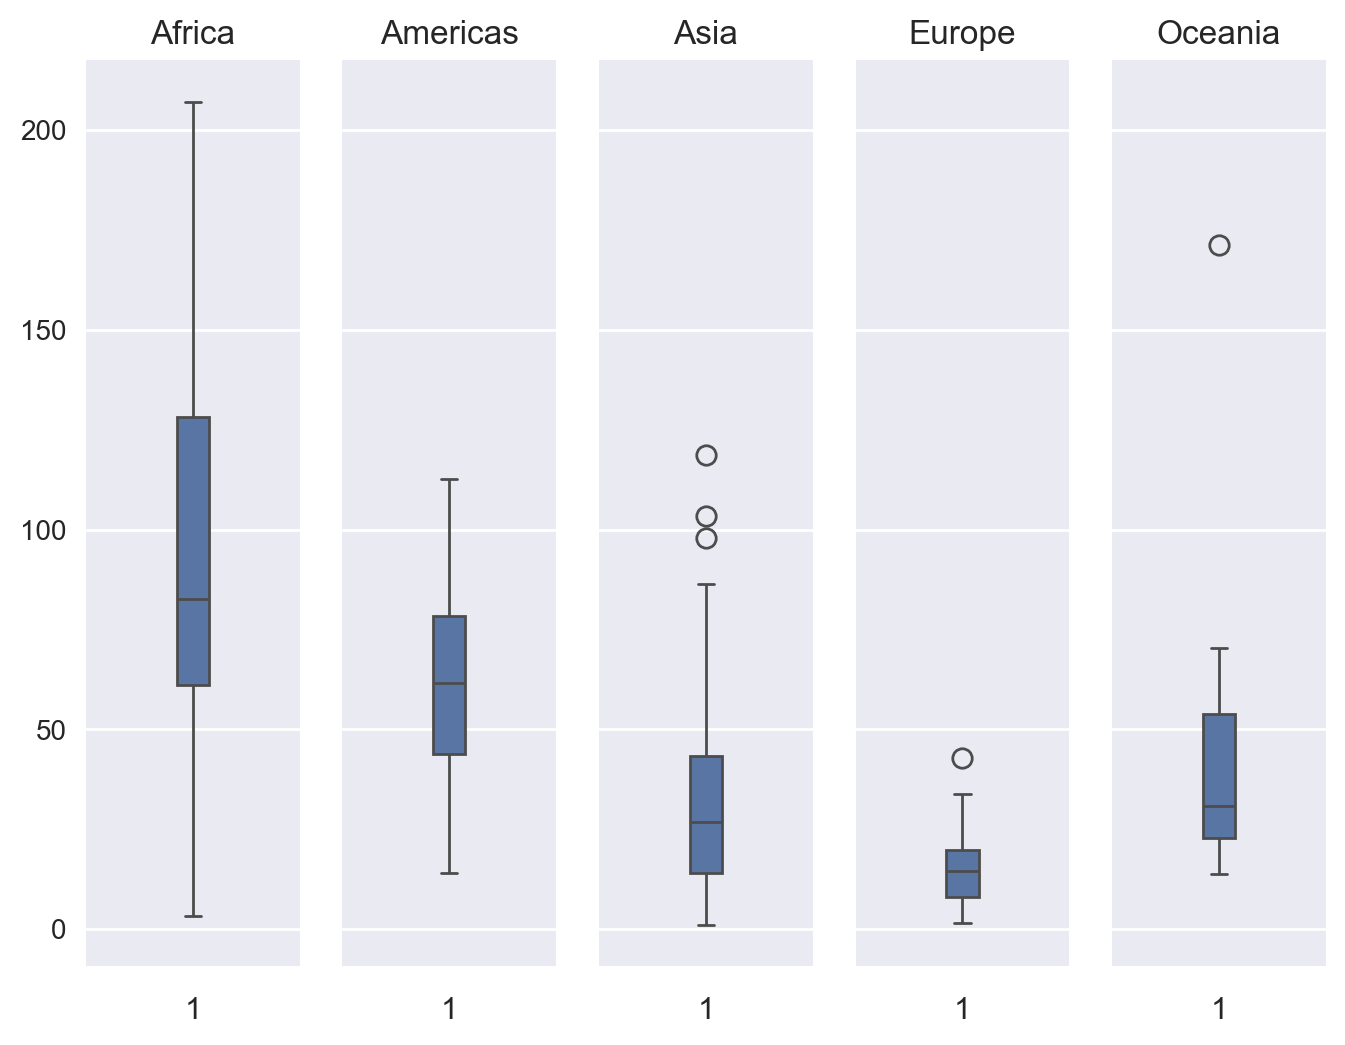


La fertilidad en mujeres de 15-19 años es mucho más alta en continentes que tienen tendencia a ser menos desarollados
África tiene el mayor índice de todos los continentes, europa el más bajo
Curiosamente oceanía tiene 1 outlier, y su media es sobre la de europa pero más baja que américa


In [52]:
j = 0
fig, axes = plt.subplots(1, len(df['region'].unique()), figsize=(8, 6), sharey=True)
for i in df['region'].unique():
  dataframe = df[df['region'] == i]
  sns.boxplot(
      ax = axes[j],
      data = dataframe,
      y = 'adfert',
      width=0.15
    )
  axes[j].set_title(i)
  axes[j].set_xlabel('1')
  axes[j].set_ylabel('')
  j += 1
plt.show()
print("""
La fertilidad en mujeres de 15-19 años es mucho más alta en continentes que tienen tendencia a ser menos desarollados
África tiene el mayor índice de todos los continentes, europa el más bajo
Curiosamente oceanía tiene 1 outlier, y su media es sobre la de europa pero más baja que américa""")

##### **Refactorizar Scatterplot**

Debemos refactorizar el siguiente scatterplot `matplotlib` a `seaborn`:

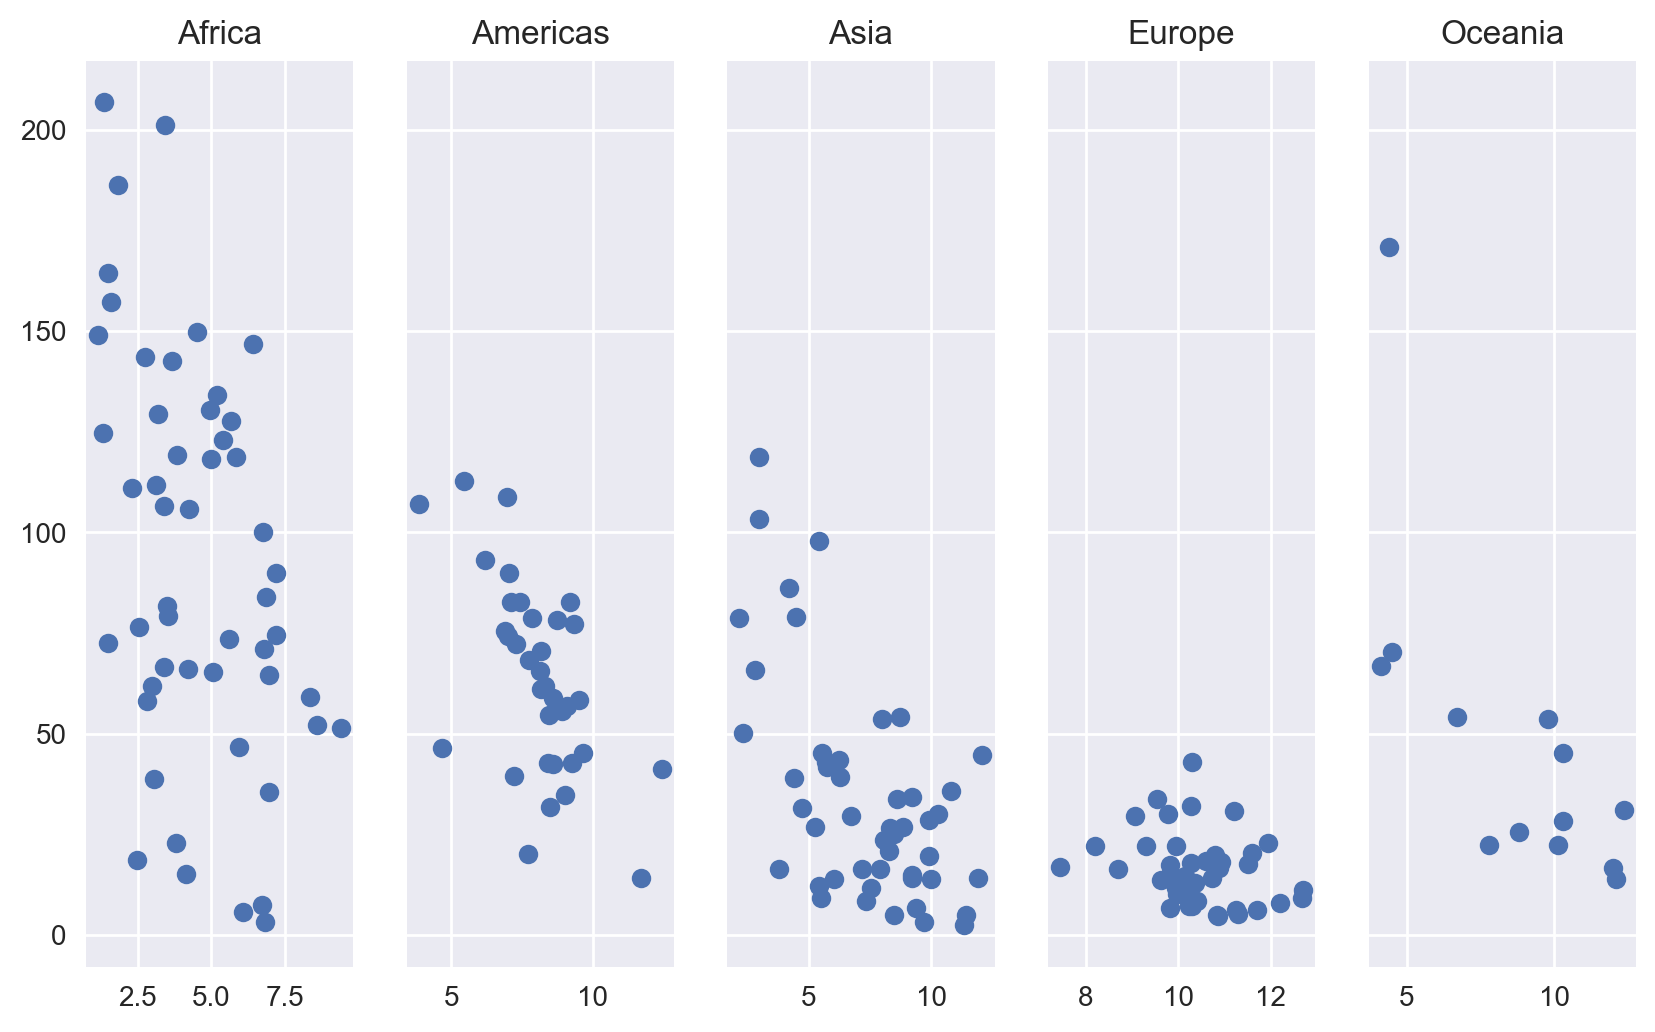

In [58]:
def grouped_scatterplot(dataframe, x, y, group_by): 
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)

    for i, n in enumerate(stratify_by): 
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o') 
        ax[i].set_title(n)

grouped_scatterplot(df, 'school', 'adfert', 'region')

Refactorizamos el gráfico con **`seaborn`**:

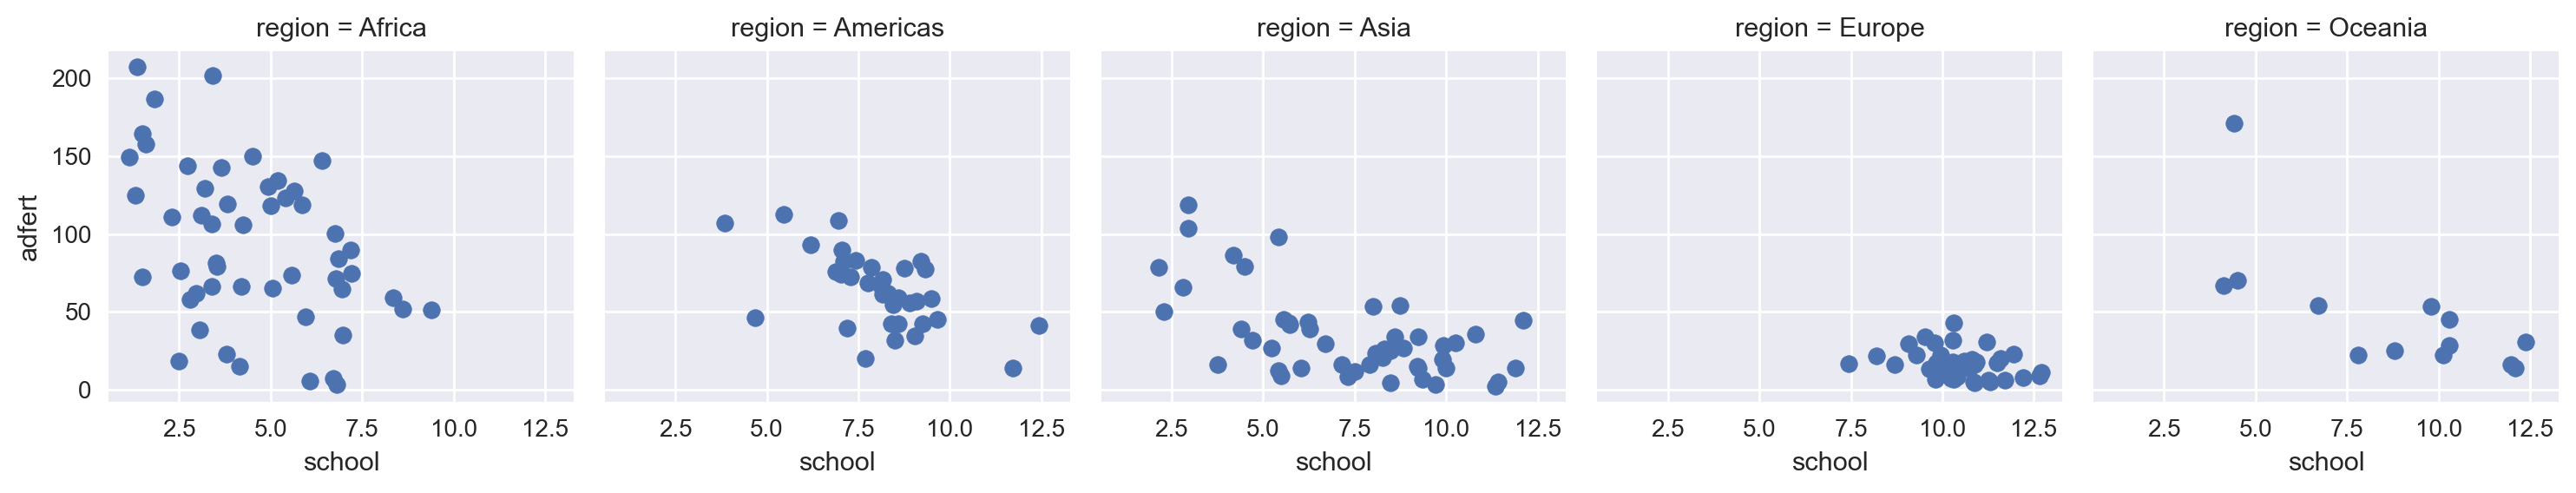

In [59]:
grid = sns.FacetGrid(df, col='region', col_wrap=5)
grid.map(plt.scatter, 'school', 'adfert')

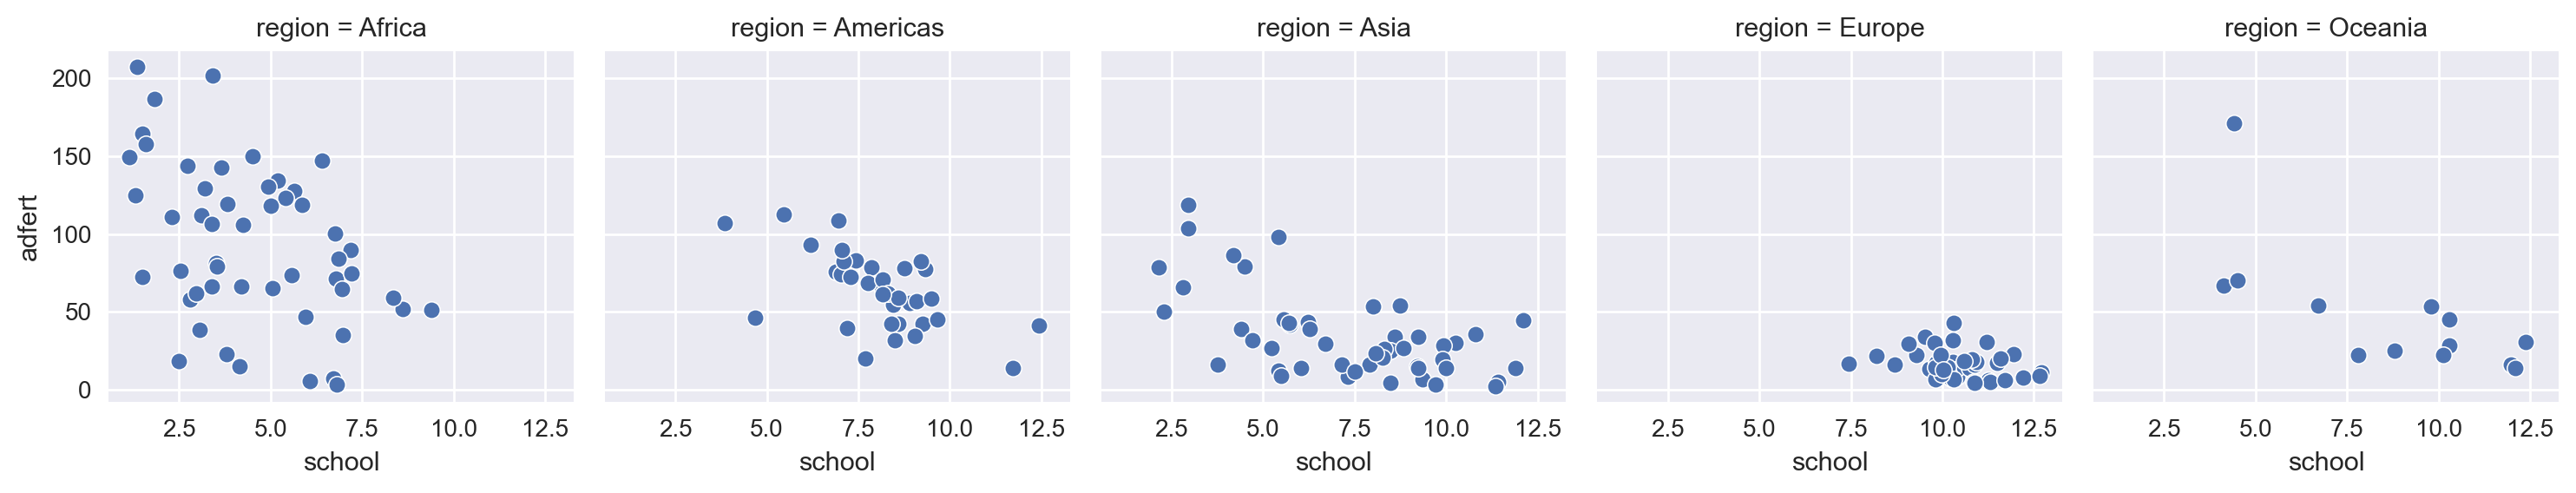

In [61]:
grid = sns.FacetGrid(df, col='region', col_wrap=5)
grid.map(sns.scatterplot, 'school', 'adfert')

Combinación de **`matplotlib`** y **`seaborn`**:

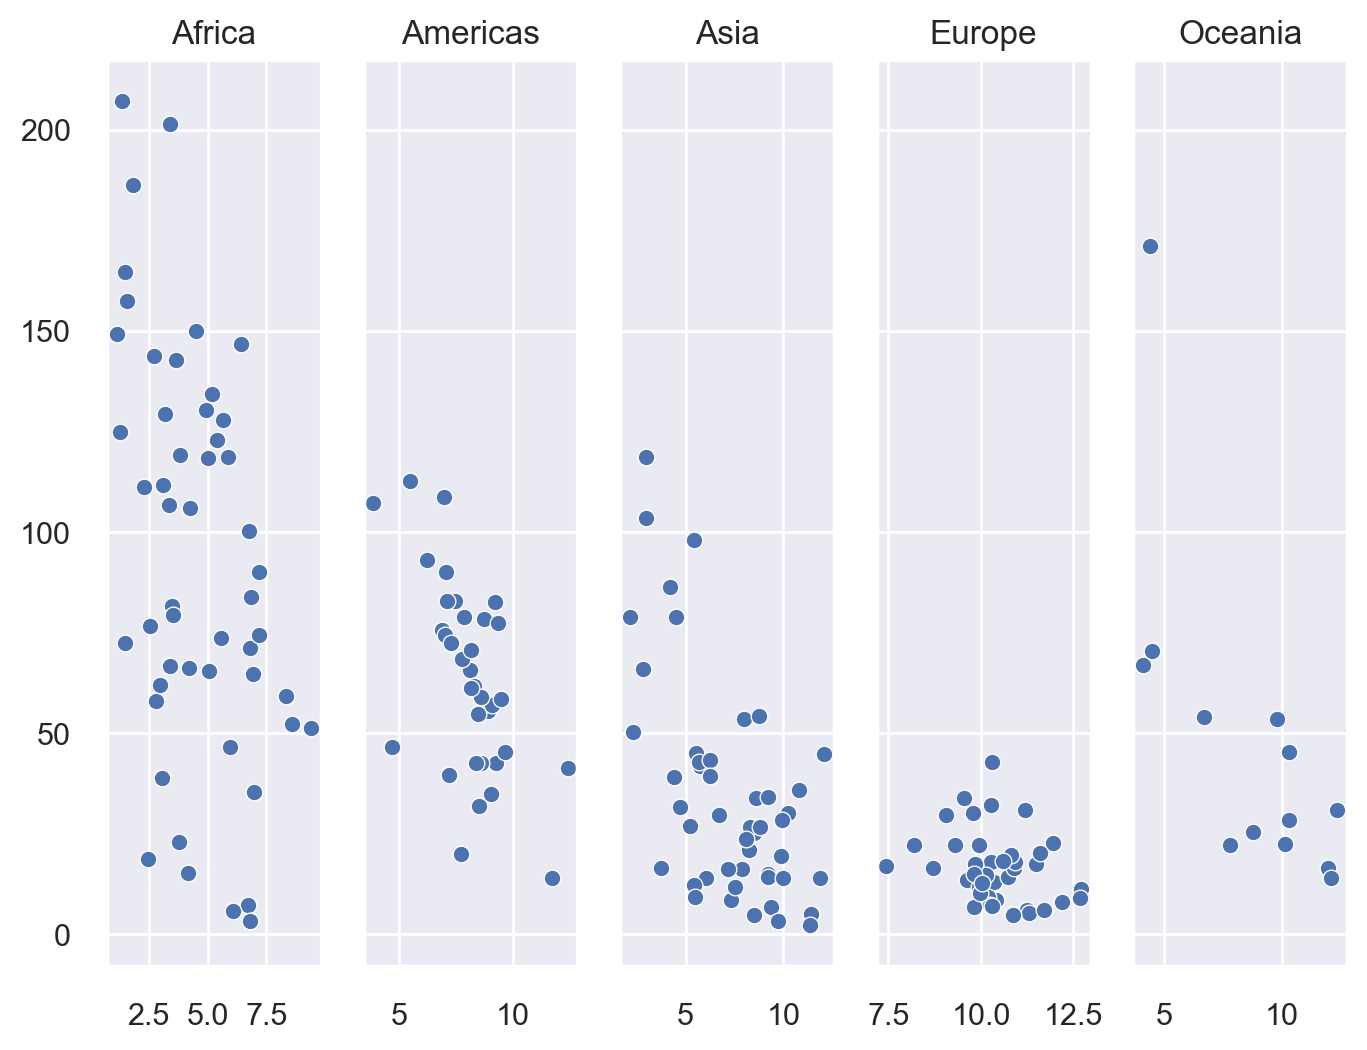


En la mayoría de los continentes a menor cantidad de años de escolaridad mayor es la fertilidad de mujeres entre 15-19 años. y biceversa
En áfrica hay índices bastantes altos de fertilidad a una cantidad de años de escolaridad baja.
También notar que en Europa, no hay paises con índices de fertilidad mayor a 50, y la cantidad de años de escolaridad es
como mínimo 7.5.
El gráfico sería mejor todavía si se compartiera xtics (sharex = True en los argumentos de plt.subplots())




In [10]:
j = 0
fig, axes = plt.subplots(1, len(df['region'].unique()), figsize=(8, 6), sharey=True)
for i in df['region'].unique():
  dataframe = df[df['region'] == i]
  sns.scatterplot(
      ax = axes[j],
      data = dataframe,
      x = 'school',
      y = 'adfert',
    )
  axes[j].set_title(i)
  axes[j].set_xlabel('')
  axes[j].set_ylabel('')
  j += 1
plt.show()
print("""
En la mayoría de los continentes a menor cantidad de años de escolaridad mayor es la fertilidad de mujeres entre 15-19 años. y biceversa
En áfrica hay índices bastantes altos de fertilidad a una cantidad de años de escolaridad baja.
También notar que en Europa, no hay paises con índices de fertilidad mayor a 50, y la cantidad de años de escolaridad es
como mínimo 7.5.
El gráfico sería mejor todavía si se compartiera xtics (sharex = True en los argumentos de plt.subplots())

""")

#### **`4. Generar un heatmap entre todas las variables`**

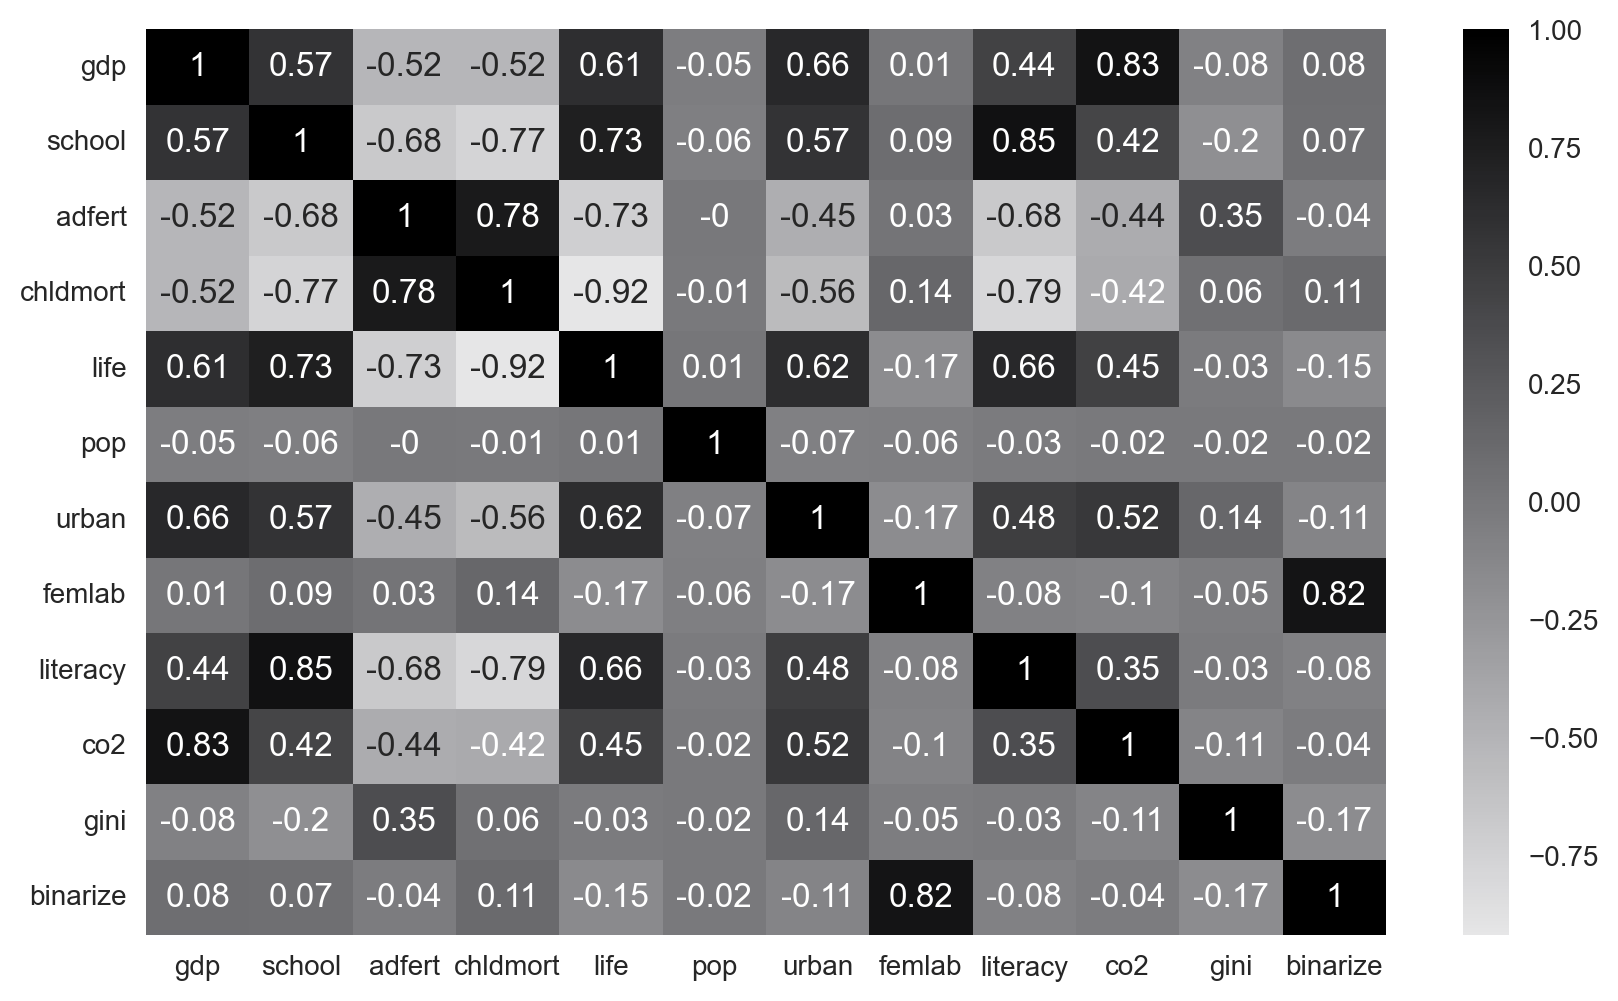


Los 6 pares de variables más POSITIVAMENTE correlacionadas con otra distinta a si mismaciones es:

1) Literacy + Schoool = 0.85 / alfabetismo vs años de escolaridad
2) co2 + gdp = 0.83 / c02 emitido vs producto interno bruto (ambos per cápita)
3) life + school = 0.73 / esperanza de vida vs años de escolaridad
4) literacy + life = 0.66 / alfabetismo vs esperanza de vida
5) urban + gdp = 0.66 / %población urbana vs producto interno bruto
6) life + gdp = 0.61 / esperanza de vida vs producto interno bruto

Comentario extra: pop no está correlacionado con nada, al igual que femlab, quizás también gini



In [64]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df.corr().round(2), cmap = cmap, annot= True)
plt.show()

print("""
Los 6 pares de variables más POSITIVAMENTE correlacionadas con otra distinta a si mismaciones es:

1) Literacy + Schoool = 0.85 / alfabetismo vs años de escolaridad
2) co2 + gdp = 0.83 / c02 emitido vs producto interno bruto (ambos per cápita)
3) life + school = 0.73 / esperanza de vida vs años de escolaridad
4) literacy + life = 0.66 / alfabetismo vs esperanza de vida
5) urban + gdp = 0.66 / %población urbana vs producto interno bruto
6) life + gdp = 0.61 / esperanza de vida vs producto interno bruto

Comentario extra: pop no está correlacionado con nada, al igual que femlab, quizás también gini
""")

Al dar valor absoluto, obtenemos las relaciones fuertes, ya sean, altas o bajas

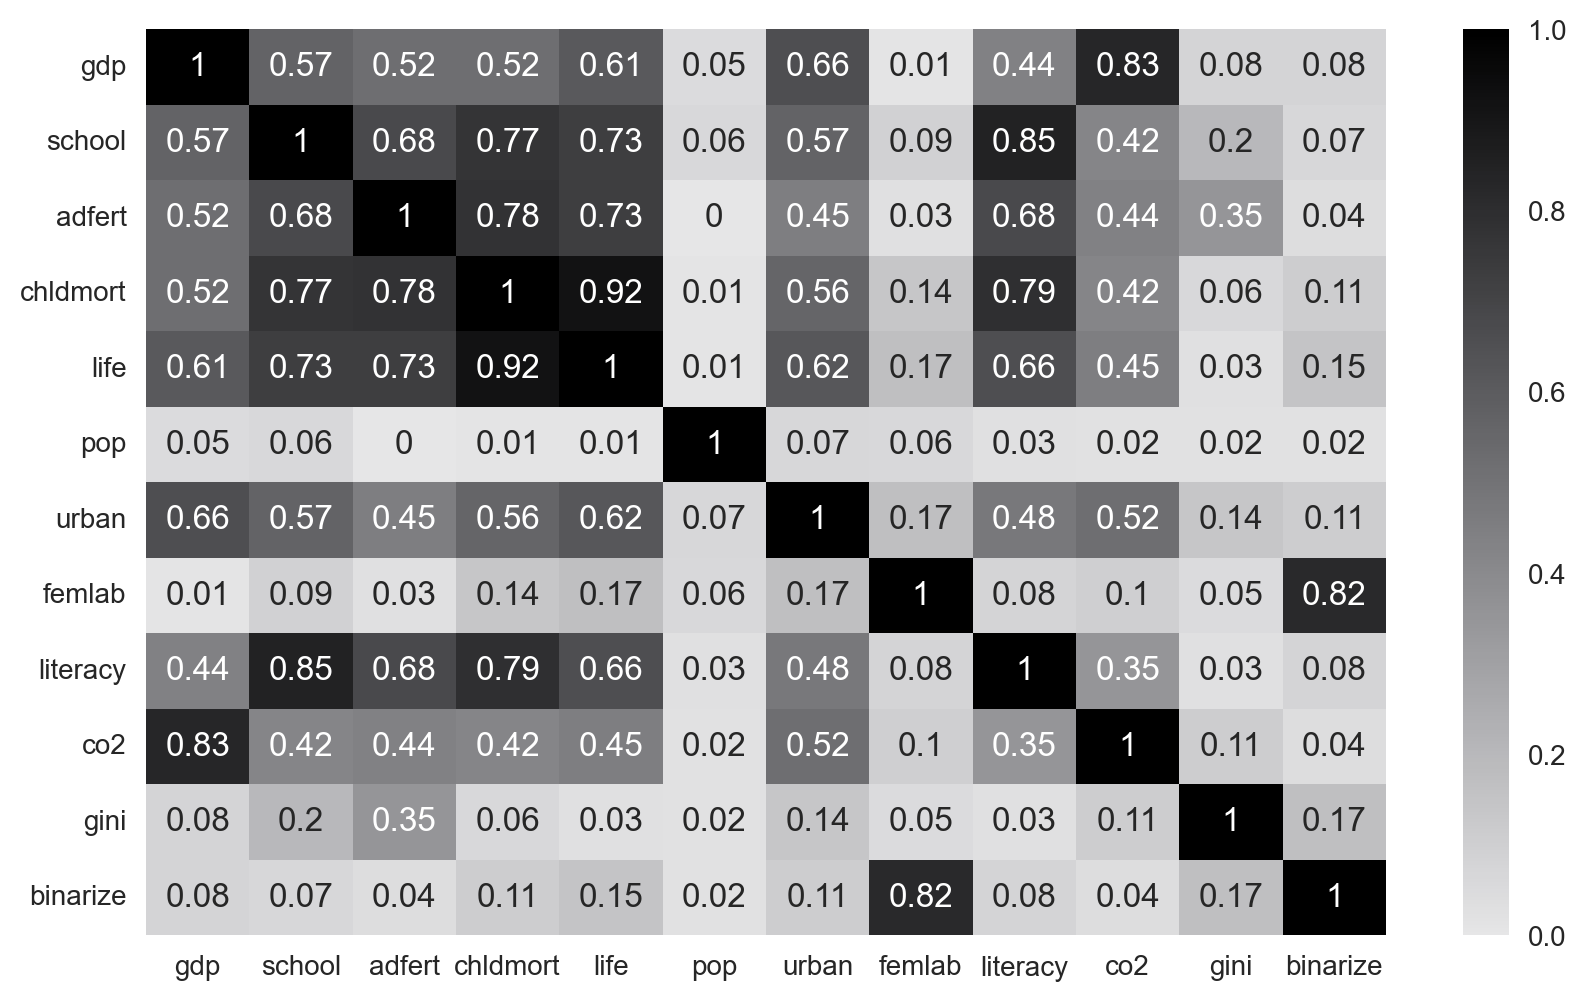

In [65]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(np.abs(df.corr().round(2)), cmap = cmap, annot= True)
plt.show()

#### **`5 - En base a las principales correlaciones, sepárelas en un nuevo objeto y calcule la matriz de correlaciones para todas las regiones`**

- **Tip** : Genere una nueva tabla segmentando con la siguiente sintaxis: `= df.loc[ : , [​ 'variables'​ , ​'a' ​,​ 'agregar' ​]]`.
No olvide agregar la variable region.

- **Tip** :​ Genere un loop para recorrer cada región y generar un heatmap.

- Comente brevemente las principales correlaciones a través de las regiones.

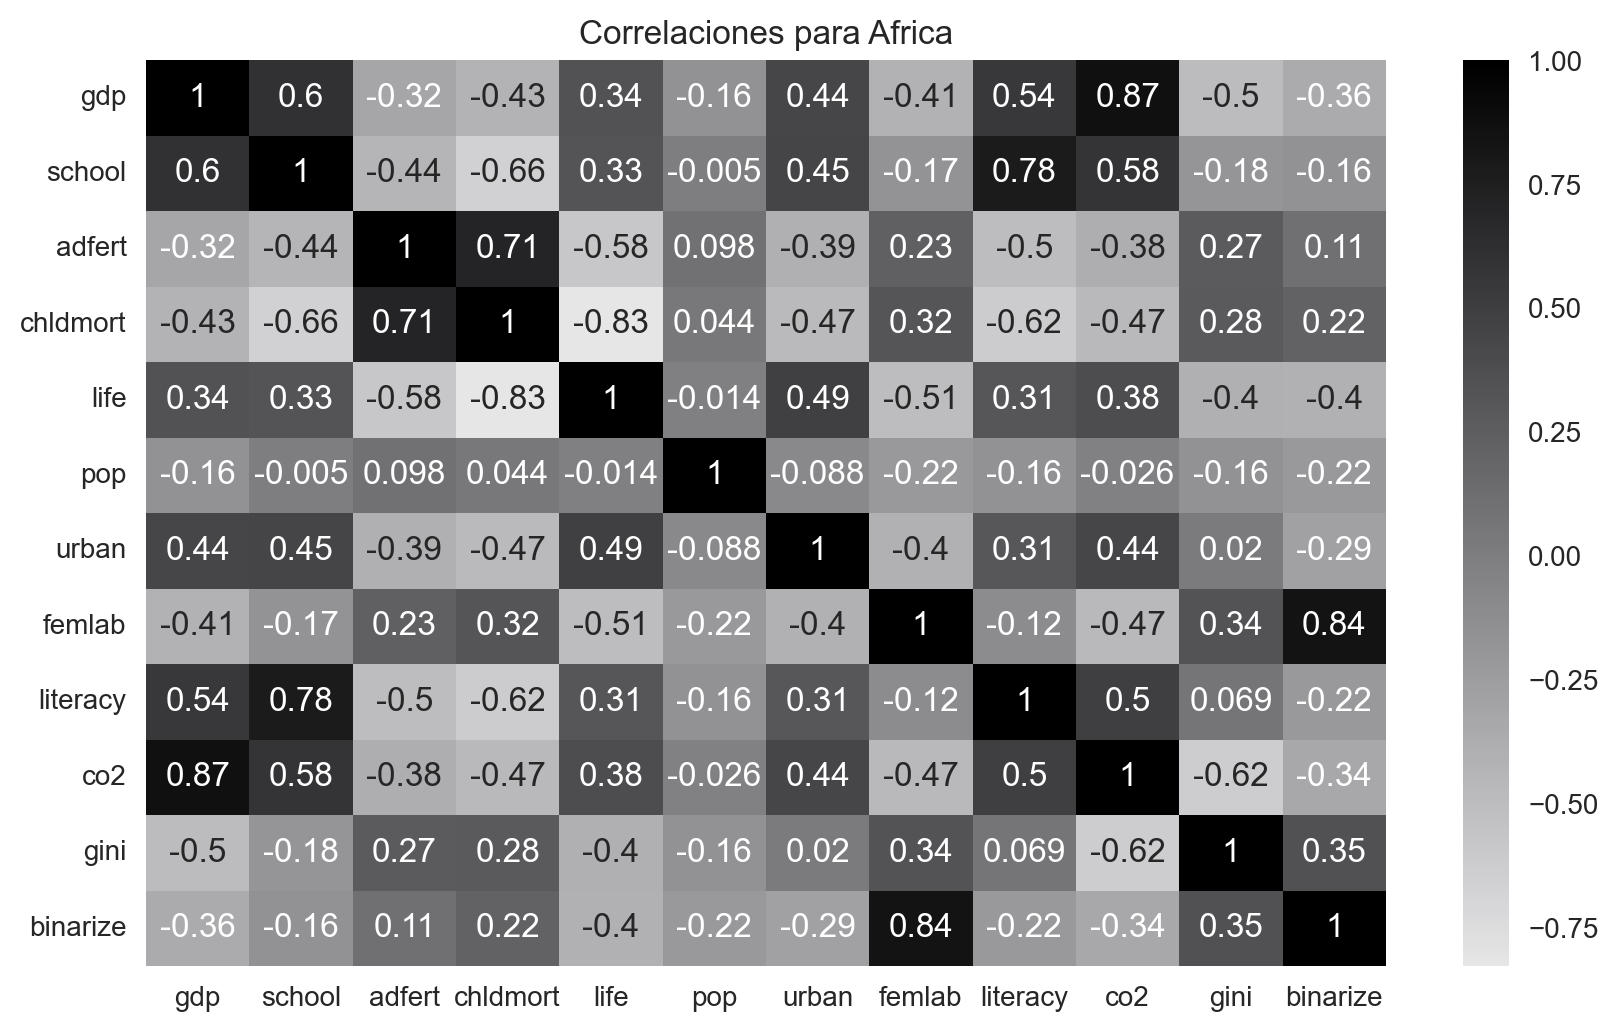

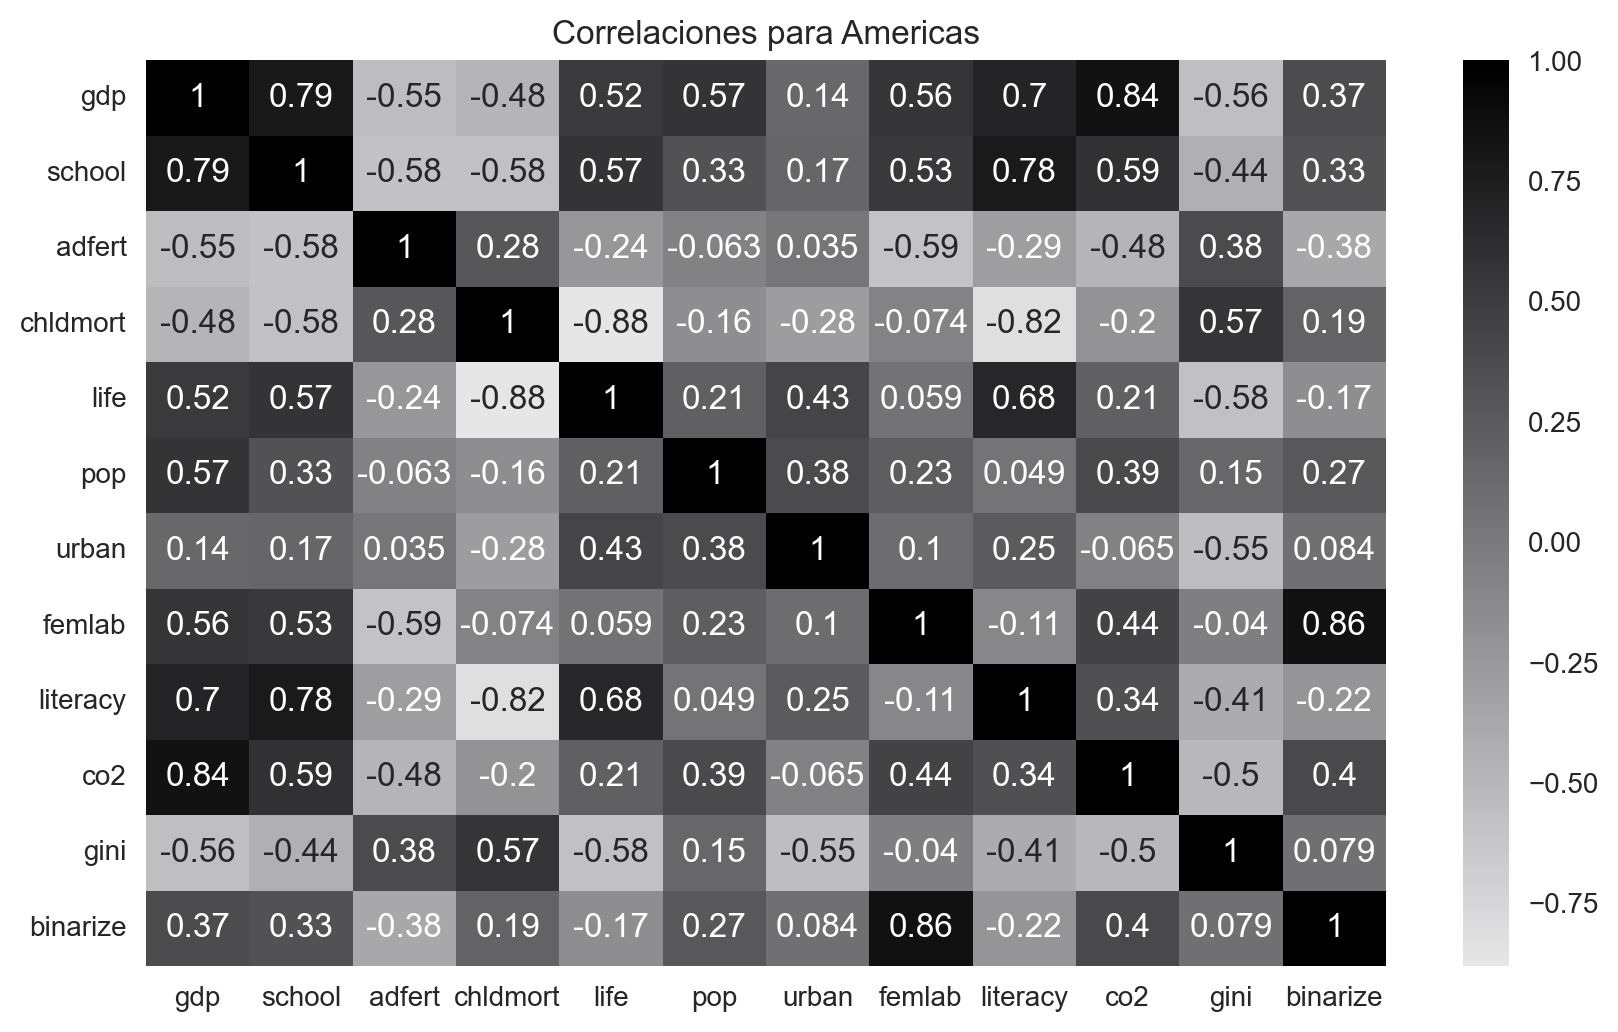

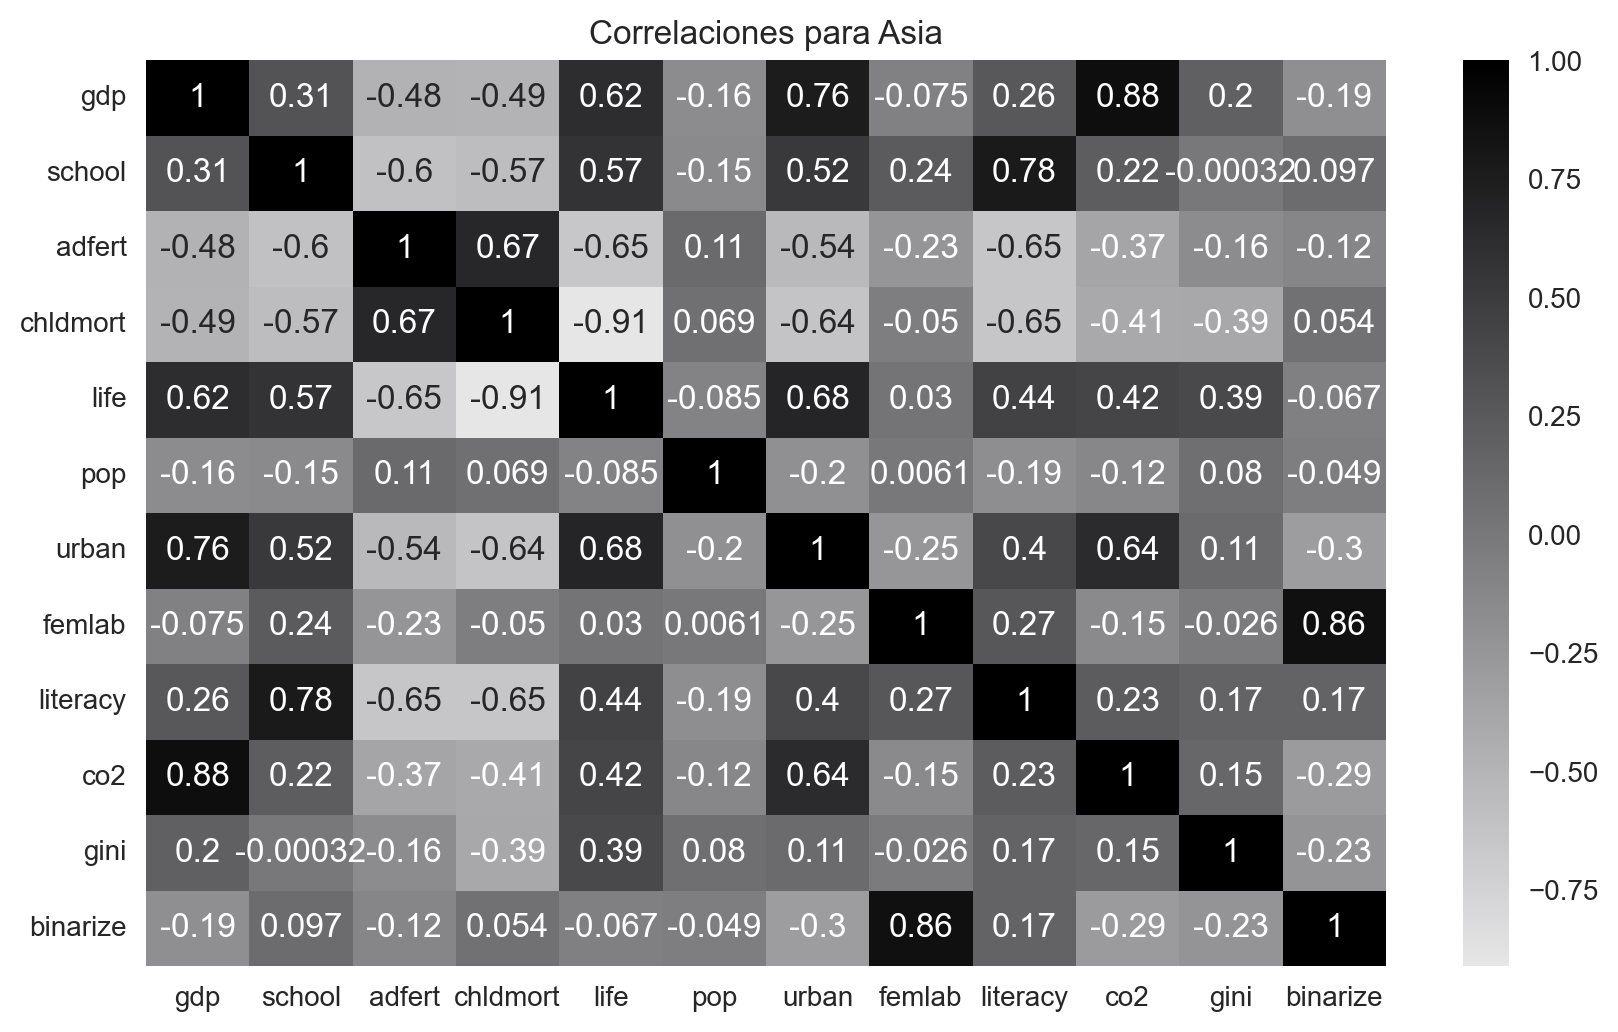

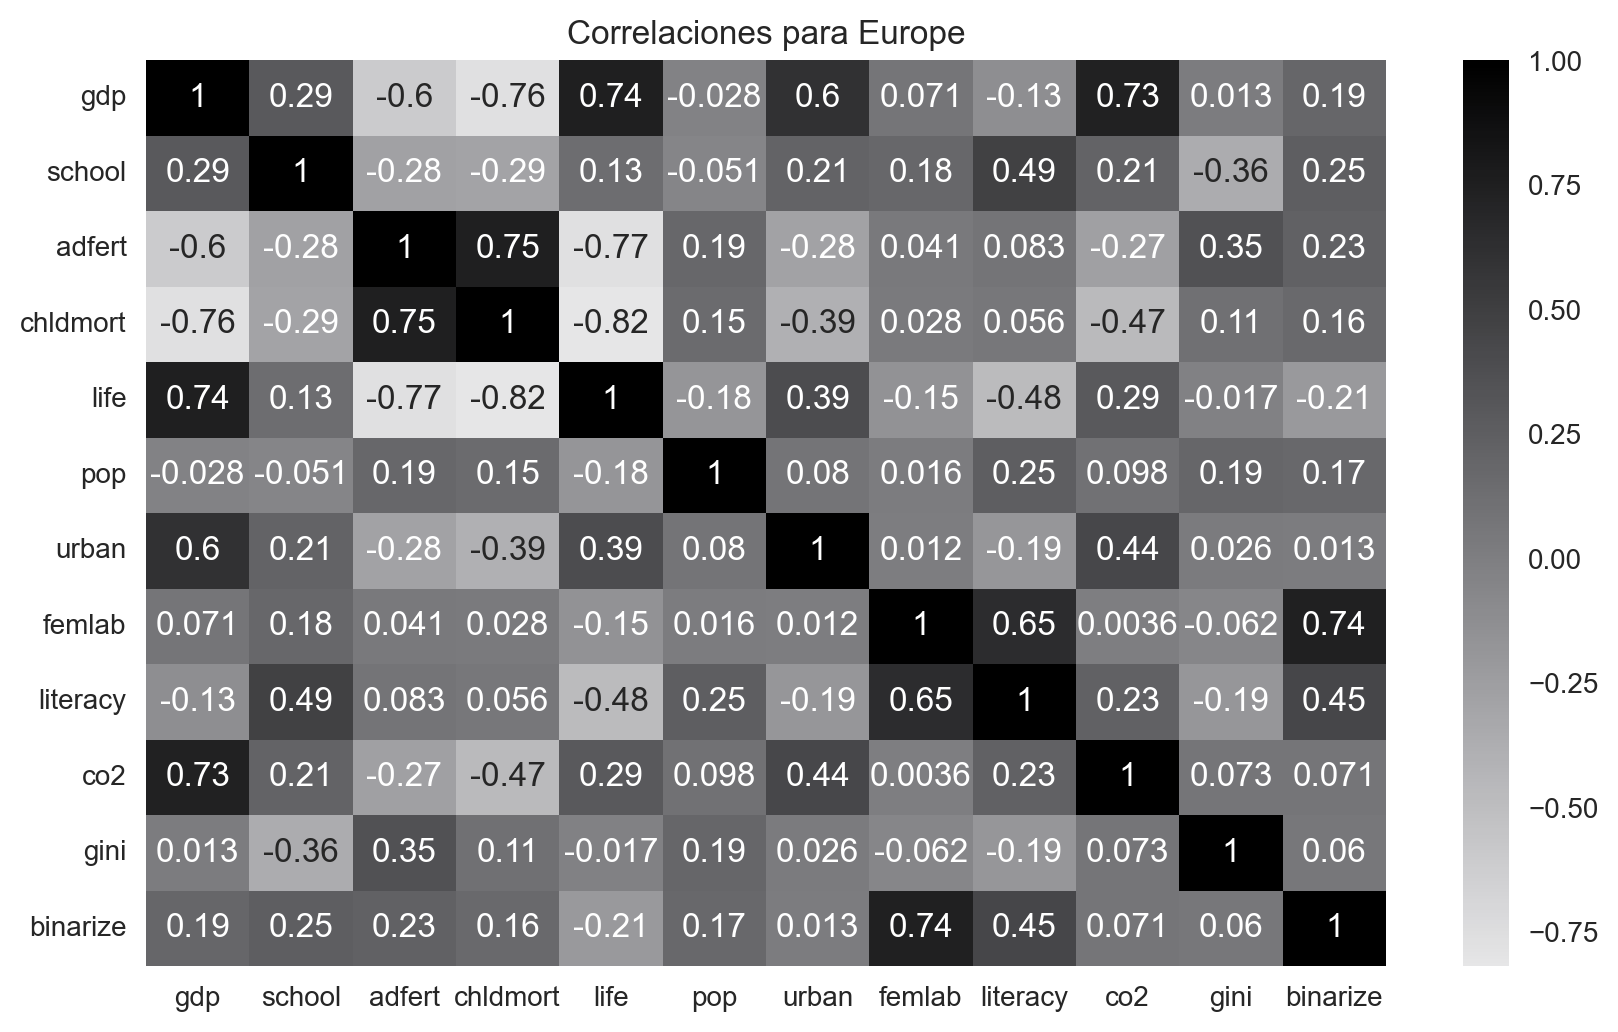

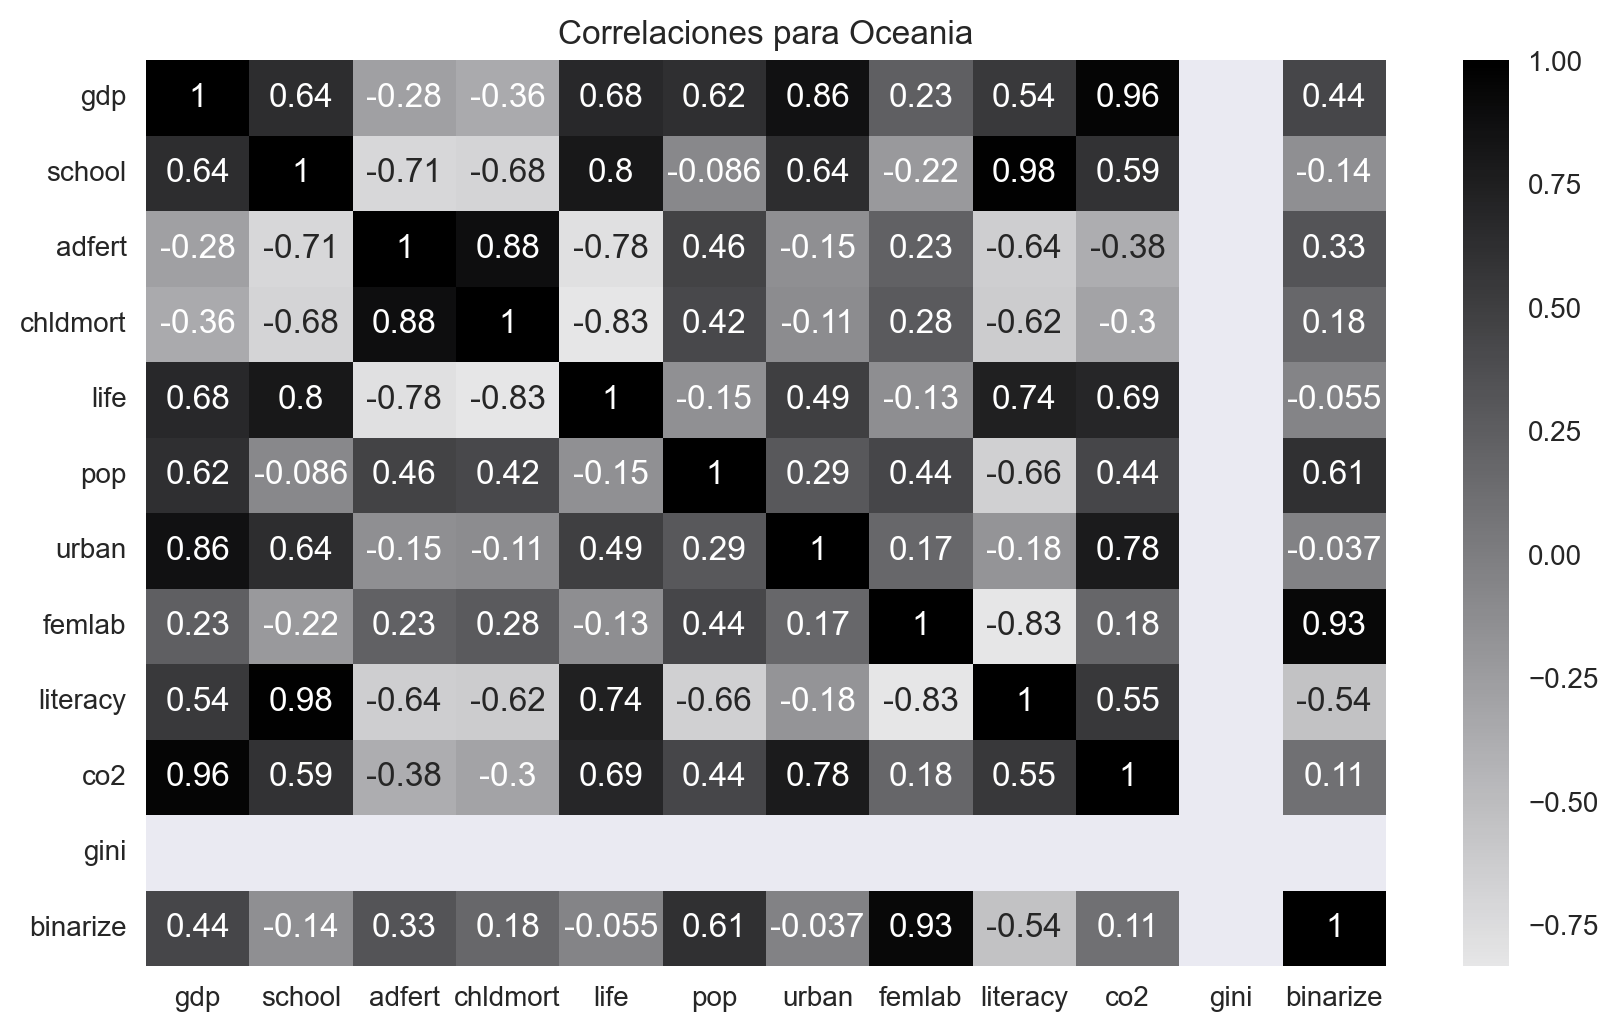

In [67]:
def correlacion_heatmap(df, var):
    valores_unicos = df[var].unique()
    for v in valores_unicos:
        plt.figure()
        cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
        sns.heatmap(df.loc[df[var]==v].corr(), cmap=cmap, annot=True)
        plt.title(f'Correlaciones para {v}')
        plt.show()

correlacion_heatmap(df, 'region')

#### **6 - Revisar nulos en el Dataframe**

In [68]:
df.isna().sum()

country       0
region        0
gdp          15
school        6
adfert        0
chldmort      1
life          0
pop           0
urban         0
femlab       17
literacy     59
co2           9
gini        113
binarize      0
dtype: int64

In [69]:
for i in df.region.unique():
    print(i)
    print(df.loc[df.region==i].shape)

Africa
(52, 14)
Americas
(35, 14)
Asia
(49, 14)
Europe
(43, 14)
Oceania
(15, 14)


In [70]:
for i in df.region.unique():
    print(i)
    print(df.loc[df.region==i].shape)
    na = df.loc[df.region==i].isna().sum()
    print(na)
    print('-'*50)

Africa
(52, 14)
country      0
region       0
gdp          2
school       1
adfert       0
chldmort     0
life         0
pop          0
urban        0
femlab       1
literacy     5
co2          1
gini        30
binarize     0
dtype: int64
--------------------------------------------------
Americas
(35, 14)
country      0
region       0
gdp          2
school       0
adfert       0
chldmort     0
life         0
pop          0
urban        0
femlab       4
literacy    15
co2          0
gini        17
binarize     0
dtype: int64
--------------------------------------------------
Asia
(49, 14)
country      0
region       0
gdp          3
school       1
adfert       0
chldmort     1
life         0
pop          0
urban        0
femlab       0
literacy     8
co2          0
gini        24
binarize     0
dtype: int64
--------------------------------------------------
Europe
(43, 14)
country      0
region       0
gdp          4
school       2
adfert       0
chldmort     0
life         0
pop      

In [71]:
for i in df.region.unique():
    print(i)
    print(df.loc[df.region==i].shape)
    na = df.loc[df.region==i].isna().sum()[df.loc[df.region==i].isna().sum()!=0]
    print(na)
    print('-'*50)

Africa
(52, 14)
gdp          2
school       1
femlab       1
literacy     5
co2          1
gini        30
dtype: int64
--------------------------------------------------
Americas
(35, 14)
gdp          2
femlab       4
literacy    15
gini        17
dtype: int64
--------------------------------------------------
Asia
(49, 14)
gdp          3
school       1
chldmort     1
literacy     8
gini        24
dtype: int64
--------------------------------------------------
Europe
(43, 14)
gdp          4
school       2
femlab       6
literacy    21
co2          6
gini        27
dtype: int64
--------------------------------------------------
Oceania
(15, 14)
gdp          4
school       2
femlab       6
literacy    10
co2          2
gini        15
dtype: int64
--------------------------------------------------
